In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import numpy as np
import random

In [2]:
# Link: https://www.kaggle.com/sobhanmoosavi/us-accidents
df = pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

In [4]:
######################################################################################################################
################################################ Cleaning data #######################################################
######################################################################################################################

# Remove irrelevant columns
del df['Source']
del df['TMC']
del df['Start_Lat']
del df['Start_Lng']
del df['End_Lat']
del df['End_Lng']
del df['Turning_Loop']
del df['Civil_Twilight']
del df['Nautical_Twilight']
del df['Astronomical_Twilight']
del df['Side']
del df['Station']
del df['Description']
del df['Distance(mi)']
del df['Number']
del df['Country']
del df['Timezone']
del df['Airport_Code']
del df['Weather_Timestamp']
del df['Temperature(F)']
del df['Wind_Chill(F)']
del df['Humidity(%)']
del df['Pressure(in)']
del df['Wind_Direction']
del df['Wind_Speed(mph)']
del df['Precipitation(in)']
del df['Amenity']
del df['Bump']
del df['Give_Way']
del df['No_Exit']
del df['ID']

In [5]:
df.head()

Severity           Start_Time             End_Time  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

                      Street          City      County State     Zipcode  \
0                     I-70 E        Dayton  Montgomery    OH       45424   
1                   Brice Rd  Reynoldsburg    Franklin    OH  43068-3402   
2             State Route 32  Williamsburg    Clermont    OH       45176   
3                     I-75 S        Dayton  Montgomery    OH       45417   
4  Miamisburg Centerville Rd        Dayton  Montgomery    OH       45459   

   Visibility(mi) Weather_Condition  Crossing  Junction  Railway  Roundabout  \
0            10.0        Light Rain     False     False    False       False   
1            10.0        Light Rain     False     False    False       False   
2            10.0          Overcast     False     False    False       False   
3             9.0     Mostly Cloudy     False     False    False       False   
4             6.0     Mostly Cloudy     False     False    False       False   

    Stop  Traffic_Calming  Traffic_Signal Sunrise_Sunset  
0  False            False           False          Night  
1  False            False           False          Night  
2  False            False            True          Night  
3  False            False           False          Night  
4  False            False            True            Day

In [6]:
# Separate Start_Time to (Start_Date, Time_Start) and End_Time to (End_Date, End_Time)
df[['Start_Date','Time_Start']] = df.Start_Time.str.split(expand=True)
df[['End_Date','Time_End']] = df.End_Time.str.split(expand=True)

# Remove Start_Time and End_Time Column
del df['Start_Time']
del df['End_Time']

In [7]:
df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

      Zipcode  Visibility(mi) Weather_Condition  Crossing  Junction  Railway  \
0       45424            10.0        Light Rain     False     False    False   
1  43068-3402            10.0        Light Rain     False     False    False   
2       45176            10.0          Overcast     False     False    False   
3       45417             9.0     Mostly Cloudy     False     False    False   
4       45459             6.0     Mostly Cloudy     False     False    False   

   Roundabout   Stop  Traffic_Calming  Traffic_Signal Sunrise_Sunset  \
0       False  False            False           False          Night   
1       False  False            False           False          Night   
2       False  False            False            True          Night   
3       False  False            False           False          Night   
4       False  False            False            True            Day   

   Start_Date Time_Start    End_Date  Time_End  
0  2016-02-08   05:46:00  2016-02-08  11:00:00  
1  2016-02-08   06:07:59  2016-02-08  06:37:59  
2  2016-02-08   06:49:27  2016-02-08  07:19:27  
3  2016-02-08   07:23:34  2016-02-08  07:53:34  
4  2016-02-08   07:39:07  2016-02-08  08:09:07

In [8]:
# Removing characters after dash in ZipCode
df['Zipcode'] = df['Zipcode'].str[:5]

In [9]:
df.head(50)

Severity                     Street              City      County State  \
0          3                     I-70 E            Dayton  Montgomery    OH   
1          2                   Brice Rd      Reynoldsburg    Franklin    OH   
2          2             State Route 32      Williamsburg    Clermont    OH   
3          3                     I-75 S            Dayton  Montgomery    OH   
4          2  Miamisburg Centerville Rd            Dayton  Montgomery    OH   
5          3             Westerville Rd       Westerville    Franklin    OH   
6          2             N Woodward Ave            Dayton  Montgomery    OH   
7          3                  N Main St            Dayton  Montgomery    OH   
8          2             Notre Dame Ave            Dayton  Montgomery    OH   
9          3             Westerville Rd       Westerville    Franklin    OH   
10         3                Outerbelt S          Columbus    Franklin    OH   
11         3                     I-70 E      Reynoldsburg    Franklin    OH   
12         2             Watervliet Ave            Dayton  Montgomery    OH   
13         2                  Salem Ave            Dayton  Montgomery    OH   
14         2                 E Broad St          Columbus    Franklin    OH   
15         2                Glencoe Ave            Dayton  Montgomery    OH   
16         2       S James H McGee Blvd            Dayton  Montgomery    OH   
17         2                Delphos Ave            Dayton  Montgomery    OH   
18         2                 Rubicon St            Dayton  Montgomery    OH   
19         2            W Hillcrest Ave            Dayton  Montgomery    OH   
20         2               Brookhill Dr          Columbus    Franklin    OH   
21         2               Princeton Dr            Dayton  Montgomery    OH   
22         2            Springboro Pike        Miamisburg  Montgomery    OH   
23         3                North Fwy S          Columbus    Franklin    OH   
24         2                 Hoover Ave            Dayton  Montgomery    OH   
25         2          Sportsman Club Rd         Johnstown     Licking    OH   
26         2                 Irving Ave            Dayton  Montgomery    OH   
27         2                W Helena St            Dayton  Montgomery    OH   
28         2             Litchfield Ave            Dayton  Montgomery    OH   
29         2                   E 4th St            Dayton  Montgomery    OH   
30         2                  Frantz Rd            Dublin    Franklin    OH   
31         2           Bellefontaine Rd            Dayton  Montgomery    OH   
32         3                North Fwy S          Columbus    Franklin    OH   
33         3                Outerbelt N          Columbus    Franklin    OH   
34         2            Olentangy Fwy N          Columbus    Franklin    OH   
35         2            Olentangy Fwy S          Columbus    Franklin    OH   
36         2                  S Main St            Dayton  Montgomery    OH   
37         2                   Diley Rd  Canal Winchester   Fairfield    OH   
38         2                   Kiser St            Dayton  Montgomery    OH   
39         3                 Stelzer Rd          Columbus    Franklin    OH   
40         2                  Monroe Rd           Lebanon      Warren    OH   
41         2               Air City Ave            Dayton  Montgomery    OH   
42         2           S State Route 72            Sabina     Clinton    OH   
43         3                 E Broad St          Columbus    Franklin    OH   
44         3               Benchwood Rd            Dayton  Montgomery    OH   
45         3                 East Fwy W          Columbus    Franklin    OH   
46         2                   Kenny Rd          Columbus    Franklin    OH   
47         3              S Hamilton Rd          Columbus    Franklin    OH   
48         2                  Brandt St            Dayton  Montgomery    OH   
49         3                     I-75 S            Day

In [10]:
# create a isHoliday column
dr = pd.date_range(start='2016-01-01', end='2020-12-31')
setUpCalendar = calendar()
holidaysCalendar = setUpCalendar.holidays(start=dr.min(), end=dr.max())

df['isHoliday'] = df['Start_Date'].isin(holidaysCalendar)

In [11]:
# Replace Weather_Condition string values with a decimal value
df['Weather_Condition'] = df['Weather_Condition'].replace(['N/A Precipitation'],0)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Freezing Fog'],1)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Haze'],2)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Thunderstorms and Rain'],3)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Clear'],4)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Haze'],5)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Scattered Clouds'],6)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy'],7)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fog'],8)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mist'],9)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy'],10)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain'],11)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Overcast'],12)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Patches of Fog'],13)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Shallow Fog'],14)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain'],15)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Drizzle'],16)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain'],17)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Smoke'],18)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorms and Rain'],19)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair'],20)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Cloudy'],21)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Volcanic Ash'],22)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Blowing Sand'],23)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle'],24)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Blowing Dust / Windy'],25)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Widespread Dust'],26)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair / Windy'],27)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain Showers'],28)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy / Windy'],29)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain / Windy'],30)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Hail'],31)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Drizzle'],32)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow'],33)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Showers in the Vicinity'],34)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorm'],35)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain Shower'],36)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain with Thunder'],37)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy / Windy'],38)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder in the Vicinity'],39)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain Showers'],40)
df['Weather_Condition'] = df['Weather_Condition'].replace(['T-Storm'],41)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow'],42)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms and Rain'],43)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder'],44)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy T-Storm'],45)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Funnel Cloud'],46)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy T-Storm / Windy'],47)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Freezing Rain'],48)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Freezing Drizzle'],49)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Blowing Snow'],50)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Thunderstorms and Snow'],51)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Snow'],52)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Low Drifting Snow'],53)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Ice Pellets'],54)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Ice Pellets'],55)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Squalls'],56)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Cloudy / Windy'],57)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Fog'],58)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sand'],59)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow Grains'],60)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms and Snow'],61)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain / Windy'],62)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain / Windy'],63)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Ice Pellets'],64)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow / Windy'],65)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Freezing Rain'],66)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Small Hail'],67)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain Showers'],68)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Wintry Mix'],69)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle and Fog'],70)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Wintry Mix / Windy'],71)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow / Windy'],72)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Snow / Windy'],73)
df['Weather_Condition'] = df['Weather_Condition'].replace(['T-Storm / Windy'],74)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fog / Windy'],75)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Haze / Windy'],76)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow and Sleet / Windy'],77)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Blowing Snow / Windy'],78)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow and Sleet'],79)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Sleet'],80)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder / Windy'],81)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain Shower'],82)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Drizzle / Windy'],83)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partial Fog'],84)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Squalls / Windy'],85)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Smoke / Windy'],86)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sand / Dust Whirlwinds'],87)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Blowing Dust'],88)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow with Thunder'],89)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder / Wintry Mix'],90)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder / Wintry Mix / Windy'],91)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain Shower / Windy'],92)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Patches of Fog / Windy'],93)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle / Windy'],94)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow and Sleet'],95)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Freezing Rain / Windy'],96)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow Shower'],97)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow and Sleet / Windy'],98)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Freezing Rain'],99)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Freezing Drizzle'],100)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sleet'],101)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain and Sleet'],102)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Sleet'],103)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow Grains'],104)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partial Fog / Windy'],105)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Widespread Dust / Windy'],106)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sand / Dust Whirlwinds / Windy'],107)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Tornado'],108)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow and Thunder'],109)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Snow with Thunder'],110)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Snow Showers'],111)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Blowing Snow'],112)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Hail'],113)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Smoke'],114)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms with Small Hail'],115)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Thunderstorm'],116)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Freezing Drizzle'],117)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Blowing Snow'],118)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorms and Snow'],119)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Freezing Rain / Windy'],120)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Dust Whirls'],121)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Sleet / Windy'],122)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mist / Windy'],123)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sleet / Windy'],124)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Sand / Dust Whirls Nearby'],125)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain Shower'],126)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder and Hail'],127)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drifting Snow'],128)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunder and Hail / Windy'],129)
df['Weather_Condition'] = df['Weather_Condition'].replace(['Snow Showers'],130)

# Fill in any null values for column Visibility, Severity, and Weather_Condition
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(round(df['Visibility(mi)'].mean(), 0))
df['Visibility(mi)'] = df['Visibility(mi)'].round(1)
df['Severity'] = df['Severity'].fillna(round(df['Severity'].mean(), 0))
df['Weather_Condition'] = df['Weather_Condition'].fillna(round(df['Weather_Condition'].mean(), 0))

In [12]:
# Replace night with 0 and day with 1
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].replace(['Night'],0)
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].replace(['Day'],1)

# Randomly replace any null value with 0 or 1
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(round(random.random()))

In [13]:
# Replace false with 0 and true with 1
df['Traffic_Calming'] = df['Traffic_Calming'].replace(['False'],0)
df['Traffic_Calming'] = df['Traffic_Calming'].replace(['True'],1)

In [14]:
# get the data that is grouped by state
groupByStateDf = df.groupby(['State']).size()

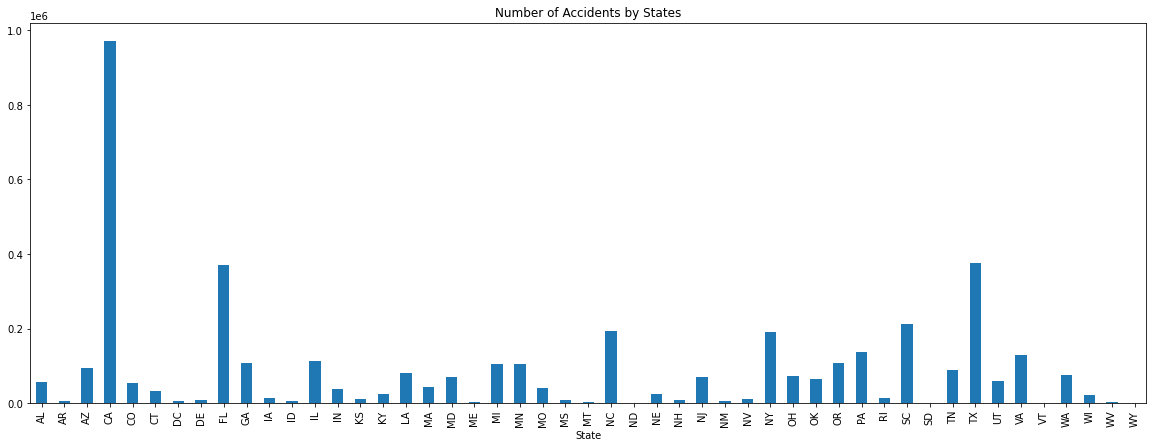

In [15]:
# plot a bar graph presenting the number of accidents for each state
# This graph tells us the number of accidents by each state
# This data can be used to make a predictions for a specific state
groupByStateDf.plot.bar(figsize=(20,7))

# Assigned a title for the plotted graph
plt.title("Number of Accidents by States")
# force show the graph to the screen
plt.show()

In [16]:
# from previous graph, we choose TX since TX has a good amount of data. CA would be a good candidate, but 
# the data is too large, therefore, it may take a longer training time

# Grab only the data for Texas (adequate amount of data) for the date 2017-01-01 to 2019-12-31
dfTexas = df.loc[(df['State'] == 'TX') & ((df['Start_Date'] > '2016-12-31') & (df['Start_Date'] < '2020-01-01'))]

<AxesSubplot:xlabel='Start_Date'>

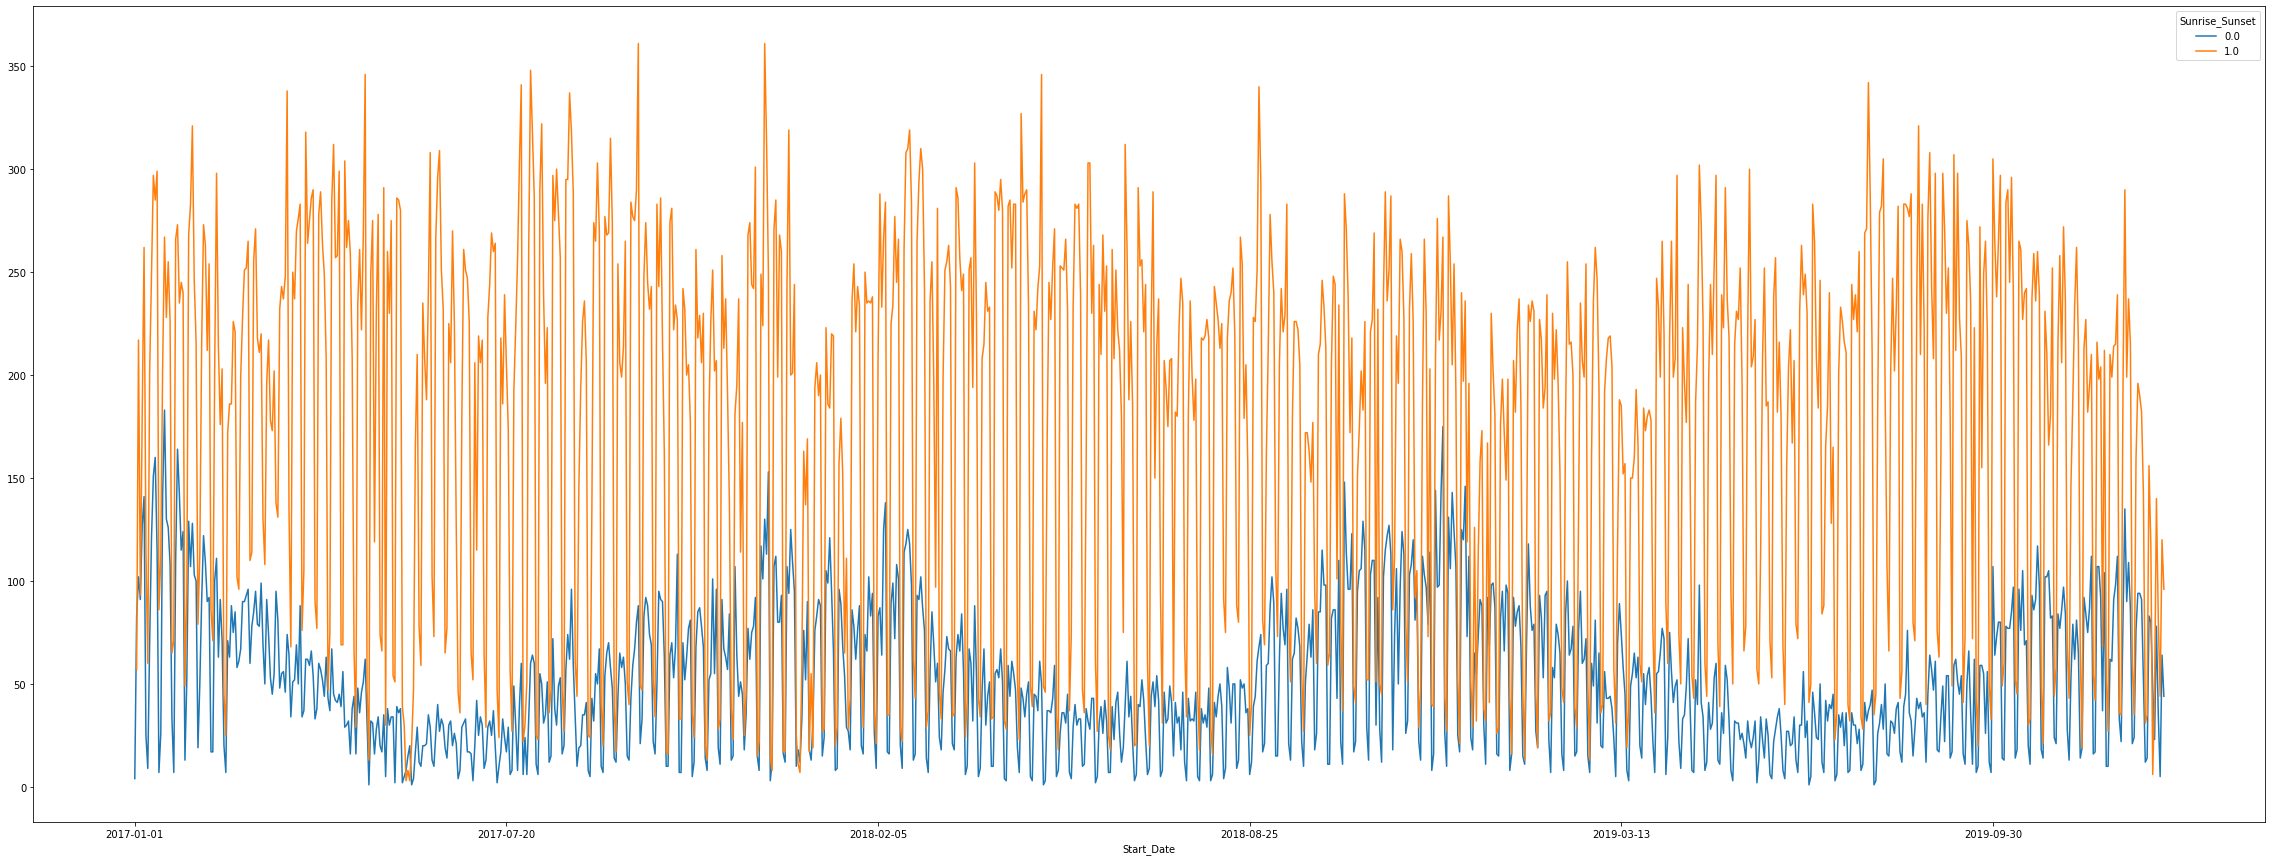

In [17]:
# Grouped Texas data by both 'Start_Date' and 'Sunrise_Sunset'
# The purpose of this is to see the number of accidents happened between day(1) and night(0) based on date
# This is useful to see the pattern of accidents
dfTexas.groupby(['Start_Date','Sunrise_Sunset']).size().unstack('Sunrise_Sunset').plot.line(figsize=(40,15))

<AxesSubplot:xlabel='Severity'>

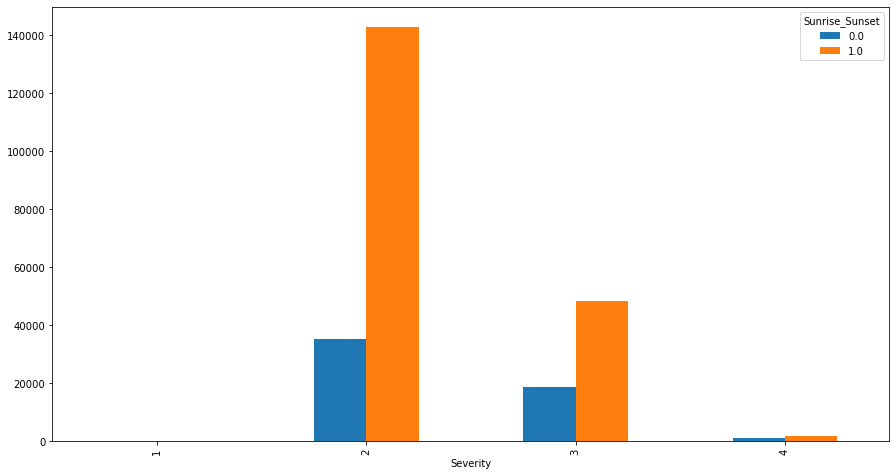

In [18]:
# Grouped Texas data by both 'Severity' and 'Sunrise_Sunset'
# The purpose of this is to see the number of accidents happened between day(1) and night(0) based on Severity
dfTexas.groupby(['Severity','Sunrise_Sunset']).size().unstack('Sunrise_Sunset').plot.bar(figsize=(15,8))

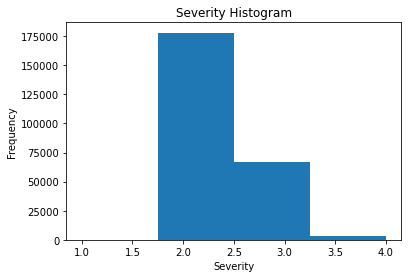

In [19]:
plt.hist(dfTexas['Severity'], bins = 4)
plt.title('Severity Histogram')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Start_Date'>

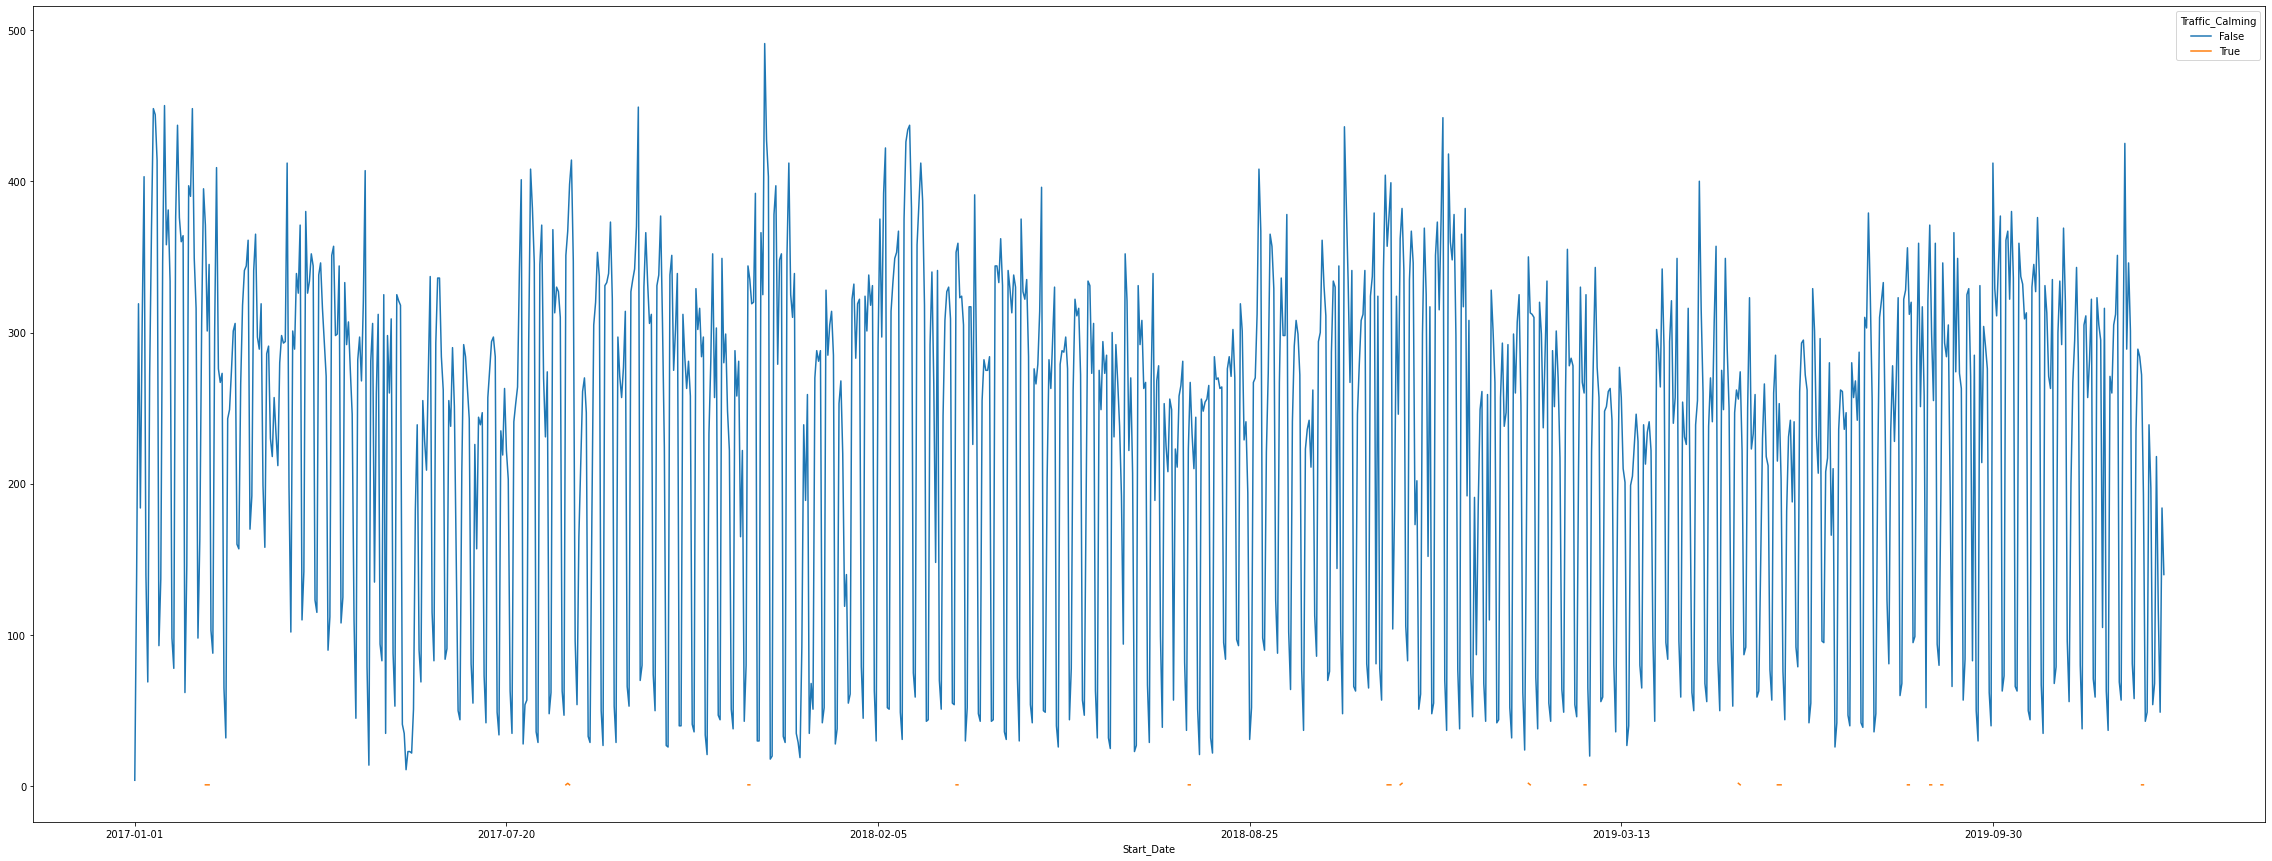

In [20]:
# Grouped Texas data by both 'Start_Date' and 'Traffic_Calming'
# The purpose of this is to see the number of accidents happened between busy(0) and not-busy(1) based on date
# This is useful to see the pattern of accidents
dfTexas.groupby(['Start_Date','Traffic_Calming']).size().unstack('Traffic_Calming').plot.line(figsize=(40,15))

In [21]:
# import ML classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

In [22]:
# Let Visibility, Weather Condition, Sunrise/Sunset, and Traffic Calming be the features
Xdf = dfTexas[['Visibility(mi)', 'Weather_Condition']]
# Let Severity be the label/output
ydf = dfTexas['Severity']

# Convert the dataframes to numpy arrays
X = Xdf.to_numpy()
y = ydf.to_numpy()

In [23]:
######################################## KNeighborsClassifier ####################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)

# Finding the best neighbor candidate between 21-45
neighbors = list(range(21,45))
score = []

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))
    
score

[0.7159302965618162,
 0.71695732141179,
 0.7161182488219421,
 0.7170378723804154,
 0.7166418301180072,
 0.7169774591539463,
 0.7167223810866326,
 0.7167290936673514,
 0.716769369151664,
 0.7167492314095077,
 0.7168700578624458,
 0.717017734638259,
 0.7172258246405413,
 0.7172392498019788,
 0.7171452736719159,
 0.7171922617369474,
 0.7171452736719159,
 0.7172929504477291,
 0.7134130787922724,
 0.7172459623826977,
 0.7133862284693974,
 0.7172526749634164,
 0.7172392498019788,
 0.7171855491562286]

In [24]:
# Let Visibility, Weather Condition, Sunrise/Sunset, and Traffic Calming be the features
Xdf = dfTexas[['Visibility(mi)', 'Weather_Condition', 'Sunrise_Sunset', 'Traffic_Calming']]
# Let Severity be the label/output
ydf = dfTexas['Severity']

# Convert the dataframes to numpy arrays
X = Xdf.to_numpy()
y = ydf.to_numpy()

In [25]:
######################################## KNeighborsClassifier ####################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 90)

# Finding the best neighbor candidate between 21-45
neighbors = list(range(21,45))
score = []

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))
    
score

[0.7146079181602158,
 0.7143931155772149,
 0.7146884691288413,
 0.7147824452589042,
 0.7149301220347175,
 0.714849571066092,
 0.714634768483091,
 0.7148092955817794,
 0.7150509484876556,
 0.7147958704203418,
 0.715252325909219,
 0.7151717749405937,
 0.715158349779156,
 0.7151449246177185,
 0.7150777988105307,
 0.7154000026850322,
 0.7151986252634688,
 0.7153463020392821,
 0.7151852001020312,
 0.7151852001020312,
 0.7147958704203418,
 0.7148629962275297,
 0.7148629962275297,
 0.7147690200974667]

Text(0, 0.5, 'Testing Accuracy')

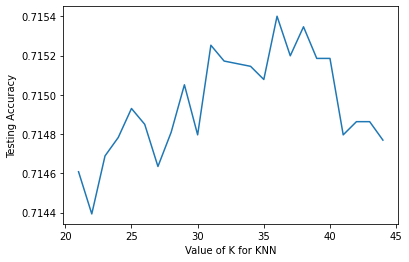

In [26]:
# Plot graph of Neighbors to pick the best KNneighbor
plt.plot(neighbors, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [27]:
####################################### Evaluating KNeighbors #####################################################

In [28]:
# Get Classification Accuracy. Classification Accurracy: the number of correct predictions made as a ratio 
# of all predictions made.

# use n_neighbors = 33 since neighbors of 33 has better accuracy and consistent

seed = 7
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
model = KNeighborsClassifier(n_neighbors = 33)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy: {:.3f} ({:.3f})'.format(results.mean(),results.std()))

Accuracy: 0.716 (0.001)


In [29]:
# Get Logarithmic Loss. 
# Logarithmic Loss: performance metric for evaluating the predictions of probabilities
# of membership to a given class
seed = 7
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
model = KNeighborsClassifier(n_neighbors = 33)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Logloss: {:.3f} ({:.3f})'.format(results.mean(),results.std()))

Logloss: -0.984 (0.027)


In [30]:
# Cross Validation Classification Confusion Matrix
# The Confusion Matrix is a handy presentation of the accuracy of a model with two or more classes
# The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cell of the table are
# the number of predictions made by a ML algorithm
test_size = 0.33
seed = 7
X_train3, X_test3, Y_train3, Y_test3 = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = KNeighborsClassifier(n_neighbors = 33)
model.fit(X_train3, Y_train3)
predicted = model.predict(X_test3)
matrix = confusion_matrix(Y_test3, predicted)
print(matrix)

[[    0    34     0     0]
 [    0 58326   403     0]
 [    0 21774   391     0]
 [    0   994    14     0]]


In [31]:
# Cross Validation Classification Report
# The classification_report() function displays the precision
model = KNeighborsClassifier(n_neighbors = 33)
model.fit(X_train3, Y_train3)
predicted = model.predict(X_test3)
report = classification_report(Y_test3, predicted)
print(report) 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.72      0.99      0.83     58729
           3       0.48      0.02      0.03     22165
           4       0.00      0.00      0.00      1008

    accuracy                           0.72     81936
   macro avg       0.30      0.25      0.22     81936
weighted avg       0.65      0.72      0.61     81936



/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
################################# Evaluating Logistic Regression ##############################################

In [33]:
# Get Classification Accuracy. Classification Accurracy: the number of correct predictions made as a ratio 
# of all predictions made.
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True)
model = LogisticRegression(max_iter=2000)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy: {:.3f} ({:.3f})'.format(results.mean(),results.std()))

Accuracy: 0.717 (0.003)


In [34]:
# Get Logarithmic Loss. 
# Logarithmic Loss: performance metric for evaluating the predictions of probabilities
# of membership to a given class
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True)
model = LogisticRegression(max_iter=2000)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Logloss: {:.3f} ({:.3f})'.format(results.mean(),results.std()))

Logloss: -0.644 (0.002)


In [35]:
# Cross Validation Classification Confusion Matrix
# The Confusion Matrix is a handy presentation of the accuracy of a model with two or more classes
# The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cell of the table are
# the number of predictions made by a ML algorithm
test_size = 0.33
seed = 7
X_train4, X_test4, Y_train4, Y_test4 = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=2000)
model.fit(X_train4, Y_train4)
predicted = model.predict(X_test4)
matrix = confusion_matrix(Y_test4, predicted)
print(matrix)

[[    0    34     0     0]
 [    0 58729     0     0]
 [    0 22165     0     0]
 [    0  1008     0     0]]


In [36]:
# Cross Validation Classification Report
# The classification_report() function displays the precision
model = LogisticRegression(max_iter=2000)
model.fit(X_train4, Y_train4)
predicted = model.predict(X_test4)
report = classification_report(Y_test4, predicted)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.72      1.00      0.84     58729
           3       0.00      0.00      0.00     22165
           4       0.00      0.00      0.00      1008

    accuracy                           0.72     81936
   macro avg       0.18      0.25      0.21     81936
weighted avg       0.51      0.72      0.60     81936



/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mknrzn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
###################################################################################################################
########################################### Make Predictions ######################################################
###################################################################################################################

# Since KNeighbors shows a better a classification report compared to Logistic Regression,
# therefore, it is better to use KNeighbors to make prediction

########################################## KNeighbors Classifier ##################################################

clf = KNeighborsClassifier(n_neighbors = 33)
clf.fit(X_train, y_train)
preds_neighbors = clf.predict([[10, 13, 1, 0]])
preds_neighbors

array([2])

In [38]:
###################################### Logistic Regression Classifier #############################################
log_reg_1 = LogisticRegression(max_iter=500)
log_reg_1.fit(X,y)

# Let the model to predict the severity of an accident given the visibility, weather condition, day/night, 
# and traffic calm
log_reg_1.predict([[10, 13, 1, 0]])

array([2])